In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

#XGBoost
import xgboost as xgb

#worning
import warnings
warnings.filterwarnings('ignore')

In [2]:
colum_name = ["MPG","Cylinders","Displacement", "HorsePower", "Weight","Acceleration", "Model Year","Origin"]

In [3]:
data = pd.read_csv("auto-mpg.data", names = colum_name, na_values = "?", comment= "\t", sep = " ", skipinitialspace= True)

In [4]:
data.head()

,MPG,Cylinders,Displacement,HorsePower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
y = data["MPG"]

In [6]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, Length: 398, dtype: float64

In [4]:
print(data.head())

    MPG  Cylinders  Displacement  HorsePower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   HorsePower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
#Handle Missing Value

print(data.isna().sum())

MPG             0
Cylinders       0
Displacement    0
HorsePower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


MPG             0
Cylinders       0
Displacement    0
HorsePower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


<AxesSubplot:xlabel='HorsePower', ylabel='Density'>

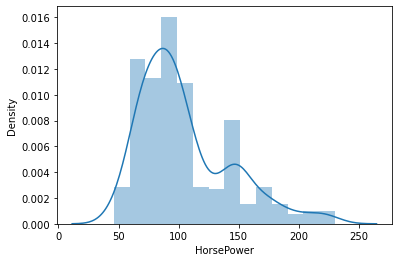

In [7]:
data["HorsePower"] = data["HorsePower"].fillna(data["HorsePower"].mean())
print(data.isna().sum())
sns.distplot(data.HorsePower)

In [8]:
# %% EDA

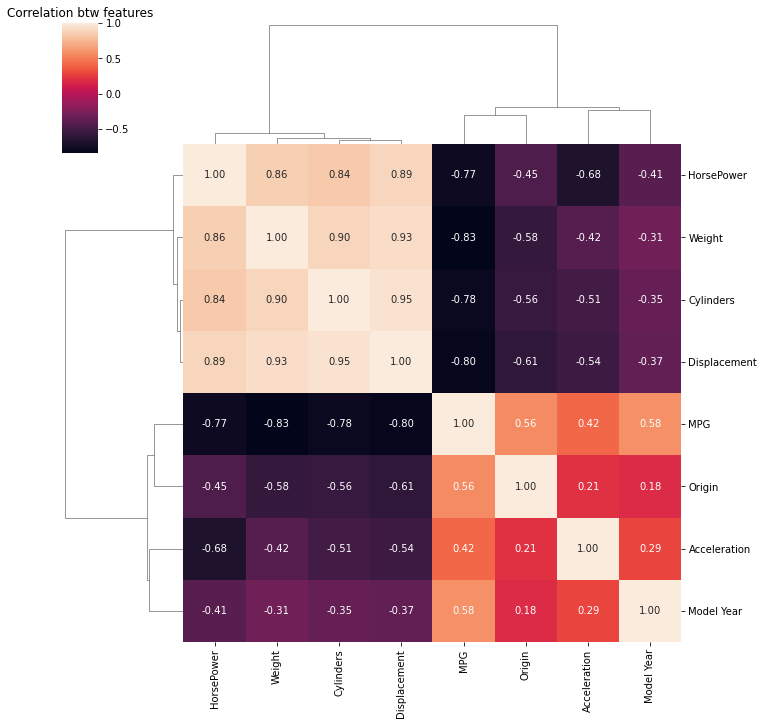

In [9]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot= True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

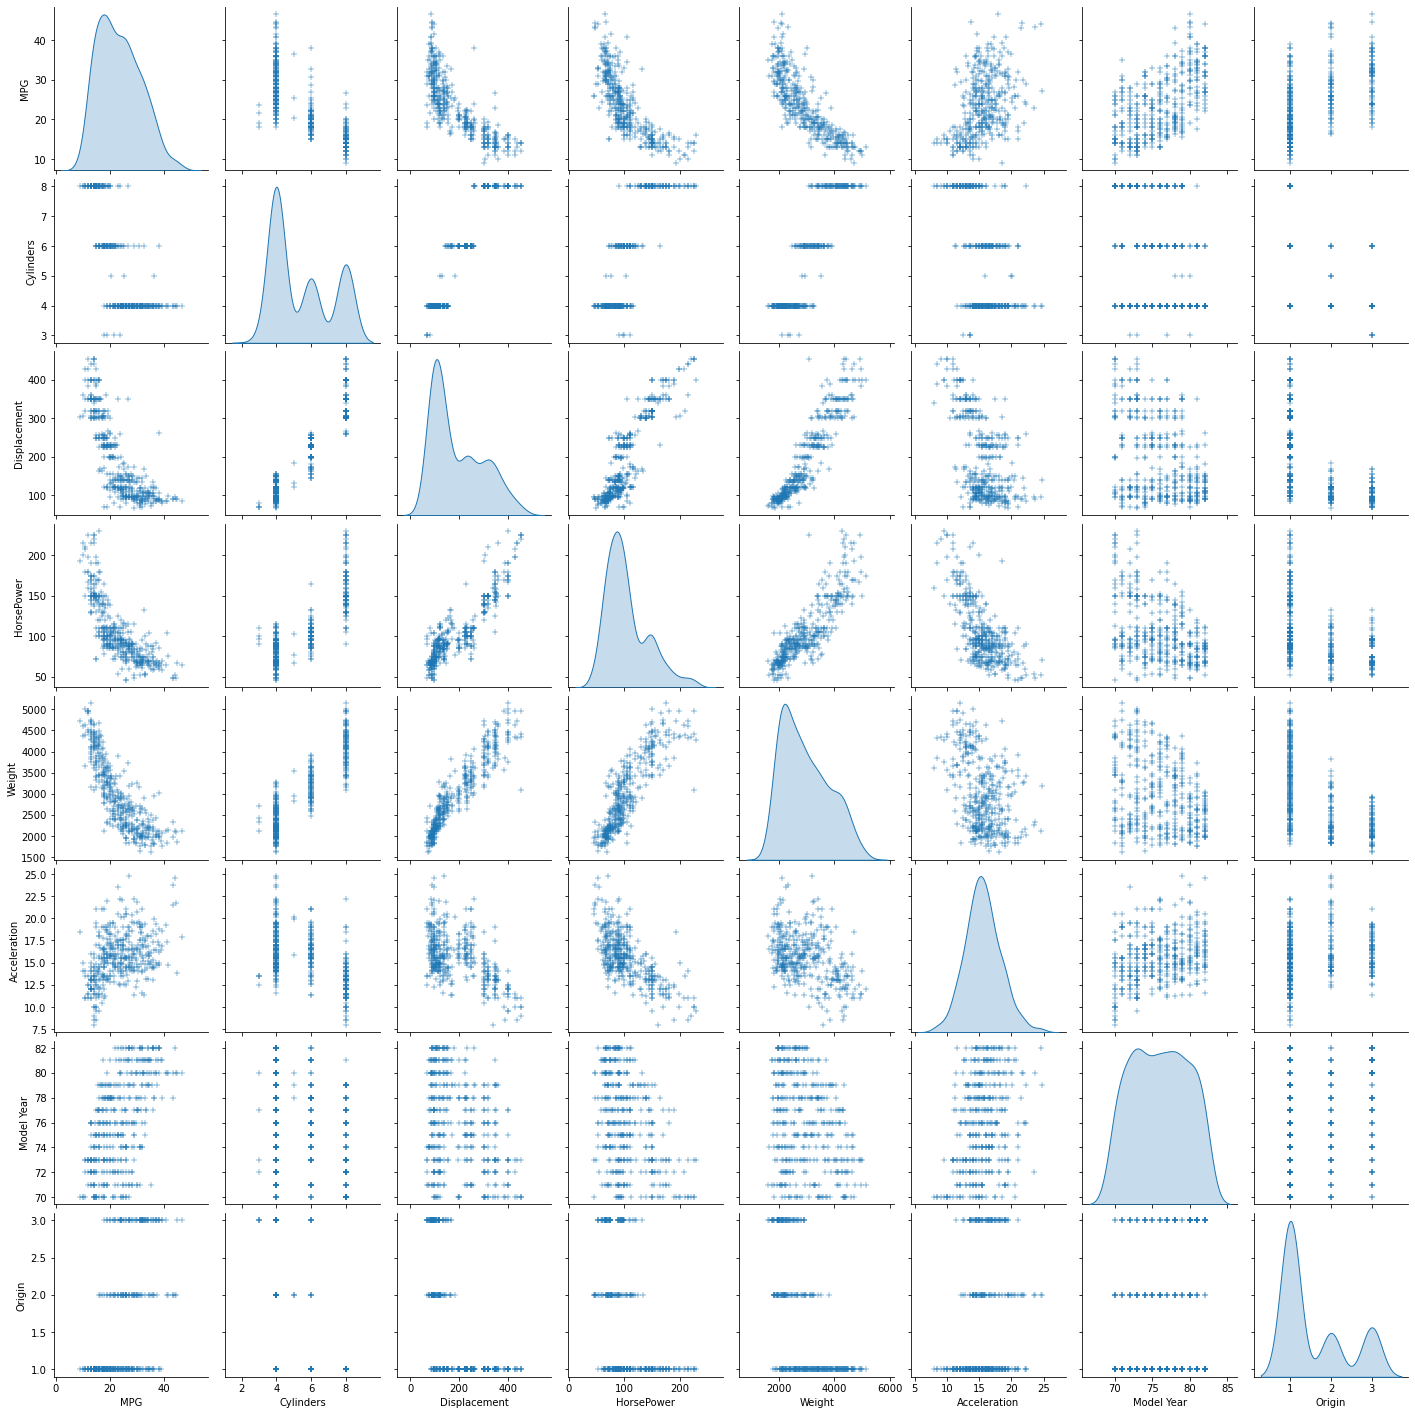

In [10]:
sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()

4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64
1    249
3     79
2     70
Name: Origin, dtype: int64


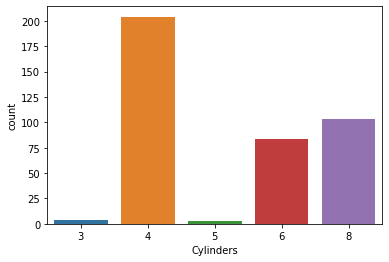

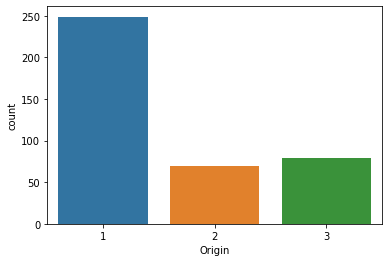

In [11]:
plt.figure()
sns.countplot(data["Cylinders"])
print(data["Cylinders"].value_counts())

plt.figure()
sns.countplot(data["Origin"])
print(data["Origin"].value_counts())

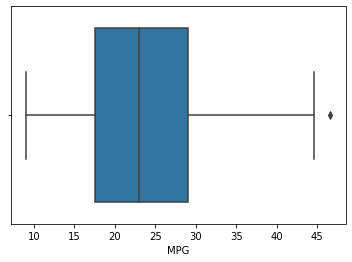

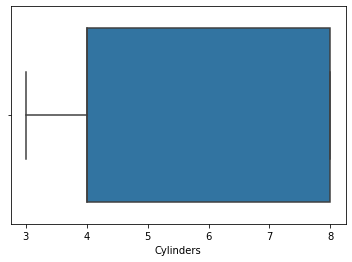

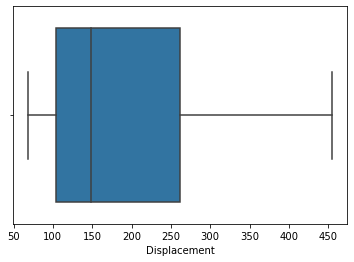

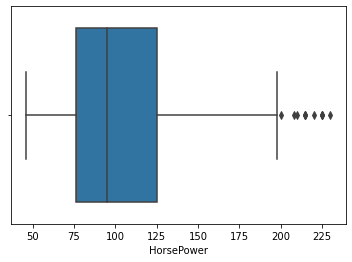

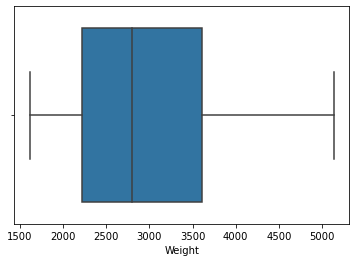

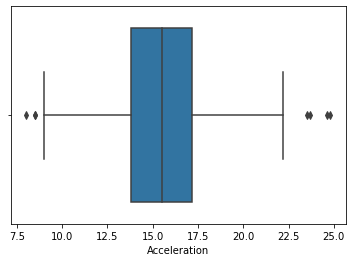

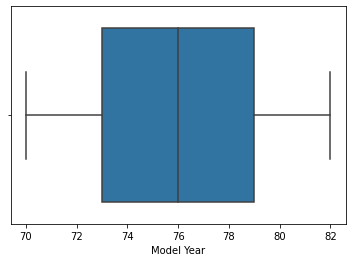

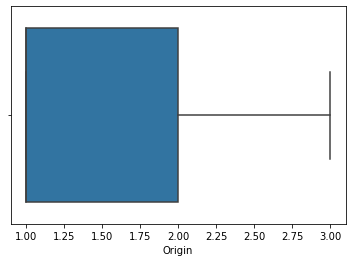

In [12]:
#BOX

for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

In [13]:
thr = 2

horsepower = data["HorsePower"]
q3_hp = horsepower[6]
q1_hp = horsepower[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < data["HorsePower"]
filter_hp_top = data["HorsePower"]<top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top 

data = data[filter_hp]


<AxesSubplot:xlabel='MPG', ylabel='Density'>

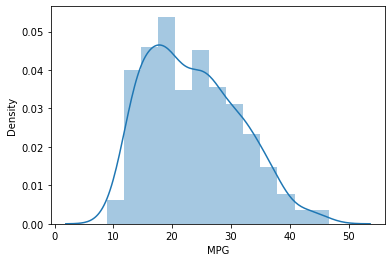

In [14]:
sns.distplot(data["MPG"])

<AxesSubplot:xlabel='MPG', ylabel='Density'>

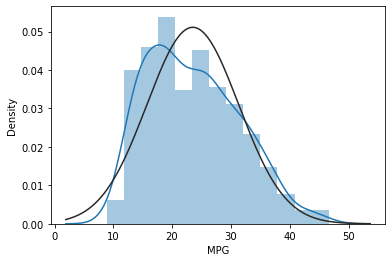

In [15]:
sns.distplot(data["MPG"], fit = norm)

In [16]:
(mu, sigma) = norm.fit(data)
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 423.80503025330734, sigma = 1010.5193283073961


<function matplotlib.pyplot.show(close=None, block=None)>

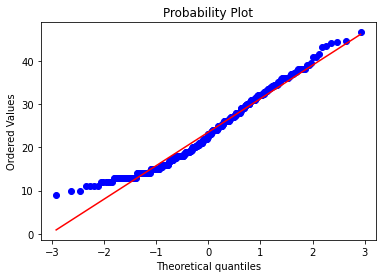

In [17]:
plt.figure()
stats.probplot(data["MPG"],plot=plt)
plt.show

<AxesSubplot:xlabel='MPG', ylabel='Density'>

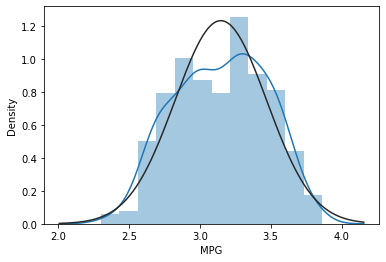

In [18]:
data["MPG"] = np.log1p(data["MPG"])
plt.figure()
sns.distplot(data.MPG, fit = norm)

In [19]:
(mu, sigma) = norm.fit(data["MPG"])
print("mu : {}, sigma = {}".format(mu, sigma))

mu : 3.1478302770344047, sigma = 0.32375928015327066


<function matplotlib.pyplot.show(close=None, block=None)>

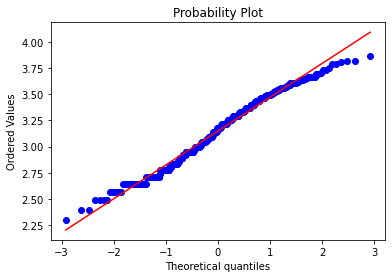

In [20]:
#qq plot
plt.figure()
stats.probplot(data["MPG"],plot=plt)
plt.show

# feature - independent variable

In [21]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

In [22]:
skewness = pd.DataFrame(skewed_feats,columns = ["skewed"])

#one hot encoding

In [23]:
data["Cylinders"] = data["Cylinders"].astype(str)
data["Origin"] = data["Origin"].astype(str)

data = pd.get_dummies(data)

Split - Stand

In [24]:
x = data.drop(["MPG"], axis = 1)
y = data.MPG

In [25]:
test_size = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

In [26]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

     Displacement  HorsePower  Weight  Acceleration  Model Year  Cylinders_3  \
54           72.0   69.000000  1613.0          18.0          71            0   
50          116.0   90.000000  2123.0          14.0          71            0   
174         171.0   97.000000  2984.0          14.5          75            0   
189         304.0  120.000000  3962.0          13.9          76            0   
395         135.0   84.000000  2295.0          11.6          82            0   
187         305.0  140.000000  4215.0          13.0          76            0   
169         232.0  100.000000  2914.0          16.0          75            0   
58           97.5   80.000000  2126.0          17.0          72            0   
48          250.0   88.000000  3139.0          14.5          71            0   
344          86.0   64.000000  1875.0          16.4          81            0   
235          97.0   75.000000  2265.0          18.2          77            0   
252         231.0  105.000000  3535.0   

# STANDARDIZATION

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
print(X_train)
print(X_test)

[[-1.13884786e+00 -9.97245365e-01 -1.56043335e+00  8.81602704e-01
  -1.39154001e+00 -1.62221421e-01  8.34057656e-01  0.00000000e+00
  -5.08000508e-01 -4.67707173e-01 -1.19895788e+00 -5.47722558e-01
   2.13808994e+00]
 [-6.32758793e-01 -2.39224800e-01 -8.92913147e-01 -7.53712656e-01
  -1.39154001e+00 -1.62221421e-01  8.34057656e-01  0.00000000e+00
  -5.08000508e-01 -4.67707173e-01 -1.19895788e+00  1.82574186e+00
  -4.67707173e-01]
 [-1.47461849e-04  1.34487215e-02  2.34018017e-01 -5.49298236e-01
  -2.89609849e-01 -1.62221421e-01 -1.19895788e+00  0.00000000e+00
   1.96850197e+00 -4.67707173e-01  8.34057656e-01 -5.47722558e-01
  -4.67707173e-01]
 [ 1.52962176e+00  8.43661721e-01  1.51408617e+00 -7.94595540e-01
  -1.41273097e-02 -1.62221421e-01 -1.19895788e+00  0.00000000e+00
  -5.08000508e-01  2.13808994e+00  8.34057656e-01 -5.47722558e-01
  -4.67707173e-01]
 [-4.14220333e-01 -4.55802104e-01 -6.67788687e-01 -1.73490187e+00
   1.63876793e+00 -1.62221421e-01  8.34057656e-01  0.00000000e+00


# LINEAR-REGRESSION

In [29]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("LR Coef : ", lr.coef_)
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Linear Regression MSE : ", mse)

LR Coef :  [-0.10606042 -0.0201215  -0.15038896  0.00083372  0.08698878 -0.04068283
  0.0130705   0.         -0.01216722  0.0128058   0.00986945  0.00258702
 -0.01549034]
Linear Regression MSE :  0.017202066865378212


# RIDGE-REGRESSION

Ridge Coef :  [-0.09350529 -0.02527218 -0.14512031 -0.00031224  0.08571775 -0.0379078
  0.01914765  0.         -0.01417617  0.00598734  0.00875576  0.00296882
 -0.01448204]
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE :  0.01683816090229305


Text(0.5, 1.0, 'Ridge')

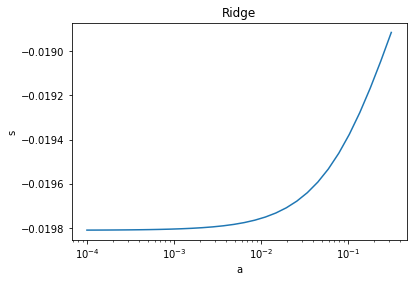

In [30]:
ridge = Ridge(random_state = 42, max_iter = 10000)

alphas = np.logspace(-4,-0.5,30)
tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Coef : ", clf.best_estimator_.coef_)

ridge = clf.best_estimator_

print("Ridge Best Estimator: ",ridge )

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE : ", mse)

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("a")
plt.ylabel("s")
plt.title("Ridge")



# LASSO - REGRESSION

Ridge Coef :  [-0.01012604 -0.03369735 -0.14555059  0.          0.07465845 -0.00500467
  0.07507603  0.         -0.         -0.         -0.          0.
 -0.        ]
Ridge Best Estimator:  Lasso(alpha=0.014873521072935119, max_iter=10000, random_state=42)
Ridge MSE :  0.013819430799394513


Text(0.5, 1.0, 'lasso')

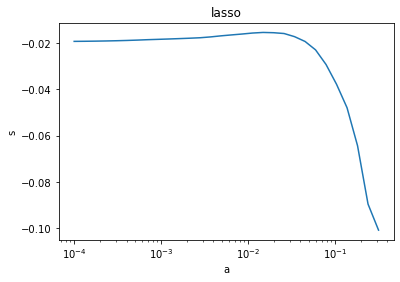

In [31]:
lasso = Lasso(random_state = 42, max_iter = 10000)

alphas = np.logspace(-4,-0.5,30)
tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Coef : ", clf.best_estimator_.coef_)

lasso = clf.best_estimator_

print("Ridge Best Estimator: ",lasso )

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE : ", mse)

plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("a")
plt.ylabel("s")
plt.title("lasso")

# ELASTICNET

In [32]:
parametersGrid = {"alpha": alphas, "l1_ratio": np.arange(0.0,1.0,0.05)}

eNet = ElasticNet(random_state = 42, max_iter = 10000)
clf = GridSearchCV(eNet, parametersGrid, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)

print("ElasticNet Coef : ",clf.best_estimator_.coef_)

print("ElasticNet : ",clf.best_estimator_)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("ElasticNet MSE : ",mse)

ElasticNet Coef :  [-0.0139838  -0.03286845 -0.14495576  0.          0.07519167 -0.00670162
  0.07309211  0.         -0.         -0.         -0.          0.
 -0.        ]
ElasticNet :  ElasticNet(alpha=0.014873521072935119, l1_ratio=0.9500000000000001,
           max_iter=10000, random_state=42)
ElasticNet MSE :  0.013850933946000104


# XGBOOST

In [36]:
model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror', max_depth = 5, min_child_weight = 4,
                            subsample = 0.7, n_estimators = 1000, learning_rate=0.07)
model_xgb.fit(X_train,Y_train)

y_predicted_dummy = model_xgb.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("XGBRegressor MSE : ",mse)

XGBRegressor MSE :  0.016256926614177474


# AVERAGING MODELS

In [47]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    #we define clones of the original models to fit the data in
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        
        #train cloned base models
        for model in self.models_:
            model.fit(X,y)
        return self
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)
    
averaged_models = AveragingModels(models = (eNet, lasso))
averaged_models.fit(X_train, Y_train)
    
y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
    
print("Averaged Models MSE : ",mse)

Averaged Models MSE :  0.03480235269910525
